# <span style="color:red">Beverages</span> <span style="color:blue">Business in Australia</span>

<img src="https://raw.githubusercontent.com/aperezace20/Data-Science-Retail-Forecasting/main/Week%209%3A%20Deliverables/flag-australia-truck-inscription-supply-chain-concept-cargo-transportation-logistics-254500107.jpg" alt="Alt text" width="400"/>

<b> Problem Statement: </b>The large company who is into beverages business in Australia. They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality. They needed forecast of each of products at item level every week in weekly buckets.

<b> Challenges: </b>The time series data showed a range of patterns, some with trends, some seasonal, and some with neither. At the time, they were using their own software, written in-house, but it often produced forecasts that did not seem sensible. Company wanted to explore power of AI/ML based forecasting to replace their in house local solution

<h2 style="background-color:white; color:red; text-align:center;"><b>Analyzing the Beverage Business in Australia</b></h2>

# <font color = #800000> </font> <font color = #800000> Importing Python Modules</font>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import requests
import io 

# <font color = #800000> </font> <font color = #800000> Importing a Database from GitHub</font>

In [2]:
url1 = "https://raw.githubusercontent.com/aperezace20/Data-Science-Retail-Forecasting/main/forecasting.csv"
download = requests.get(url1).content
forecasting = pd.read_csv(io.StringIO(download.decode('utf-8')))

# <font color = #800000> </font> <font color = #800000> Data Cleaning Best Practices</font>

In [3]:
forecasting.dtypes

Product                object
date                   object
Sales                   int64
Price Discount (%)     object
In-Store Promo          int64
Catalogue Promo         int64
Store End Promo         int64
Google_Mobility       float64
Covid_Flag              int64
V_DAY                   int64
EASTER                  int64
CHRISTMAS               int64
dtype: object

In [4]:
forecasting.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [5]:
forecasting.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1213,SKU6,10/18/2020,96619,54%,0,1,0,-7.56,1,0,0,0
1214,SKU6,10/25/2020,115798,52%,0,1,0,-8.39,1,0,0,0
1215,SKU6,11/1/2020,152186,54%,1,0,1,-7.43,1,0,0,0
1216,SKU6,11/8/2020,26445,44%,1,0,1,-5.95,1,0,0,0
1217,SKU6,11/15/2020,26414,44%,0,0,0,-7.20,1,0,0,0


In [6]:
forecasting.shape

(1218, 12)

In [7]:
forecasting.isnull().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

In [8]:
forecasting.size

14616

# <font color = #800000> </font> <font color = #800000> Exploring Data through Visuals</font>

In [9]:
forecasting['date'] = pd.to_datetime(forecasting['date'])

def get_month(dt):
    return dt.month

forecasting['month'] = forecasting['date'].apply(get_month)

print(forecasting)

     Product       date   Sales Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05   27750                 0%               0   
1       SKU1 2017-02-12   29023                 0%               1   
2       SKU1 2017-02-19   45630                17%               0   
3       SKU1 2017-02-26   26789                 0%               1   
4       SKU1 2017-03-05   41999                17%               0   
...      ...        ...     ...                ...             ...   
1213    SKU6 2020-10-18   96619                54%               0   
1214    SKU6 2020-10-25  115798                52%               0   
1215    SKU6 2020-11-01  152186                54%               1   
1216    SKU6 2020-11-08   26445                44%               1   
1217    SKU6 2020-11-15   26414                44%               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0             0.00           0      0   
1  

In [10]:
forecasting.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,month
0,SKU1,2017-02-05,27750,0%,0,0,0,0.0,0,0,0,0,2
1,SKU1,2017-02-12,29023,0%,1,0,1,0.0,0,1,0,0,2
2,SKU1,2017-02-19,45630,17%,0,0,0,0.0,0,0,0,0,2
3,SKU1,2017-02-26,26789,0%,1,0,1,0.0,0,0,0,0,2
4,SKU1,2017-03-05,41999,17%,0,0,0,0.0,0,0,0,0,3


In [11]:
forecasting.groupby('month')['Sales'].sum()

month
1     1593297
2     2519111
3     2896089
4     2703389
5     2935247
6     3741038
7     3155868
8     3368431
9     3904996
10    3948299
11    3293141
12    2840013
Name: Sales, dtype: int64

# <font color = maroon> Bar Graph Months & Sales 

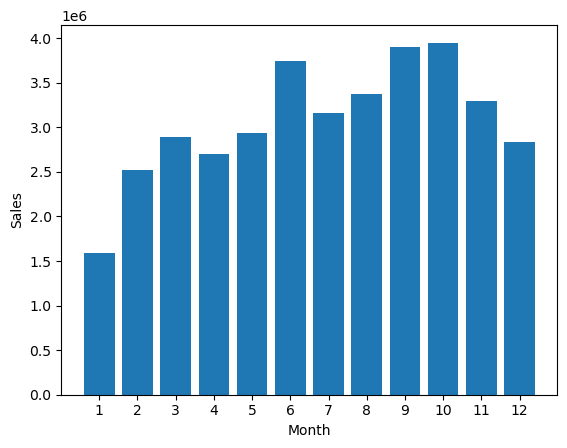

In [12]:
months=range(1,13)
plt.bar(months,forecasting.groupby('month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [13]:
forecasting['date'] = pd.to_datetime(forecasting['date'])

def get_week(dt):
    return dt.week

forecasting['week'] = forecasting['date'].apply(get_week)

print(forecasting)


     Product       date   Sales Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05   27750                 0%               0   
1       SKU1 2017-02-12   29023                 0%               1   
2       SKU1 2017-02-19   45630                17%               0   
3       SKU1 2017-02-26   26789                 0%               1   
4       SKU1 2017-03-05   41999                17%               0   
...      ...        ...     ...                ...             ...   
1213    SKU6 2020-10-18   96619                54%               0   
1214    SKU6 2020-10-25  115798                52%               0   
1215    SKU6 2020-11-01  152186                54%               1   
1216    SKU6 2020-11-08   26445                44%               1   
1217    SKU6 2020-11-15   26414                44%               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0             0.00           0      0   
1  

In [14]:
forecasting.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,month,week
0,SKU1,2017-02-05,27750,0%,0,0,0,0.0,0,0,0,0,2,5
1,SKU1,2017-02-12,29023,0%,1,0,1,0.0,0,1,0,0,2,6
2,SKU1,2017-02-19,45630,17%,0,0,0,0.0,0,0,0,0,2,7
3,SKU1,2017-02-26,26789,0%,1,0,1,0.0,0,0,0,0,2,8
4,SKU1,2017-03-05,41999,17%,0,0,0,0.0,0,0,0,0,3,9


In [15]:
forecasting.tail()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,month,week
1213,SKU6,2020-10-18,96619,54%,0,1,0,-7.56,1,0,0,0,10,42
1214,SKU6,2020-10-25,115798,52%,0,1,0,-8.39,1,0,0,0,10,43
1215,SKU6,2020-11-01,152186,54%,1,0,1,-7.43,1,0,0,0,11,44
1216,SKU6,2020-11-08,26445,44%,1,0,1,-5.95,1,0,0,0,11,45
1217,SKU6,2020-11-15,26414,44%,0,0,0,-7.20,1,0,0,0,11,46


In [16]:
forecasting.groupby('week')['Sales'].sum()

week
1      404197
2      274017
3      503420
4      411663
5      544510
6      467530
7      938796
8      568275
9      532382
10     727695
11     668500
12     669007
13     565763
14     552748
15     692771
16     603542
17     587070
18     727625
19     771618
20     717736
21     616437
22     762434
23    1479433
24     497415
25     801706
26     716710
27     753112
28     621651
29     902260
30     464016
31     753892
32     527270
33    1111139
34     859558
35     612421
36     588452
37     844061
38    1012207
39    1120322
40     709936
41     901001
42     908310
43    1273157
44    1176035
45     946712
46     539707
47     630687
48     488267
49     618055
50     485115
51     814636
52     433940
Name: Sales, dtype: int64

In [17]:
filter=forecasting['month']=='date'
len(forecasting[~filter])

1218

In [18]:
forecasting['month']=forecasting['month'].astype(int)

In [19]:
forecasting.groupby('month')['Sales'].sum()

month
1     1593297
2     2519111
3     2896089
4     2703389
5     2935247
6     3741038
7     3155868
8     3368431
9     3904996
10    3948299
11    3293141
12    2840013
Name: Sales, dtype: int64

In [20]:
forecasting.groupby('month')['In-Store Promo'].sum()

month
1     30
2     46
3     47
4     45
5     37
6     46
7     53
8     49
9     59
10    45
11    61
12    57
Name: In-Store Promo, dtype: int64

In [21]:
forecasting.groupby('month')['Catalogue Promo'].sum()

month
1     17
2     14
3     18
4     27
5     19
6     23
7     22
8     17
9     24
10    35
11    21
12    22
Name: Catalogue Promo, dtype: int64

In [22]:
forecasting.groupby('month')['Store End Promo'].sum()

month
1     22
2     38
3     29
4     28
5     26
6     44
7     38
8     43
9     42
10    41
11    43
12    31
Name: Store End Promo, dtype: int64

In [23]:
forecasting.groupby('week')['Store End Promo'].sum()

week
1      8
2      1
3     10
4      3
5     11
6     10
7     10
8      7
9      8
10     6
11     6
12     5
13     4
14     3
15     5
16    11
17     9
18     4
19     5
20     5
21    10
22    11
23    10
24    10
25    13
26     9
27    11
28     8
29     8
30     4
31    11
32    11
33    14
34     5
35     9
36     3
37    13
38    12
39     9
40    10
41    10
42     6
43    13
44    13
45    11
46     8
47    10
48     8
49     8
50     6
51     6
52     4
Name: Store End Promo, dtype: int64

# <font color = maroon> Analyzing the Effectiveness of Promotional Strategies on Sales

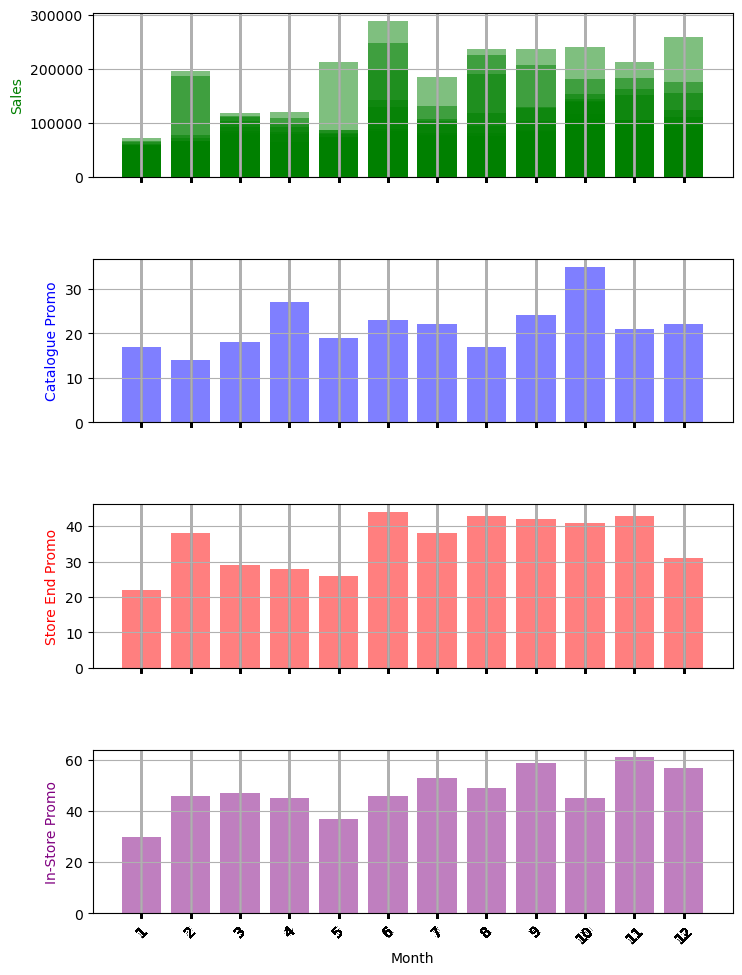

In [24]:
# Group the data by month and sum the promotion values for each group
catalogue_data = forecasting.groupby('month')['Catalogue Promo'].sum()
store_end_data = forecasting.groupby('month')['Store End Promo'].sum()
in_store_data = forecasting.groupby('month')['In-Store Promo'].sum()

# Create subplots for Sales, Catalogue Promo, Store End Promo, and In-Store Promo
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))

# Create bar plot for Sales
ax1.bar(forecasting['month'], forecasting['Sales'], color='green', alpha=0.5)
ax1.set_ylabel('Sales', color='green')

# Create bar plot for Catalogue Promo
ax2.bar(catalogue_data.index, catalogue_data.values, color='blue', alpha=0.5)
ax2.set_ylabel('Catalogue Promo', color='blue')

# Create bar plot for Store End Promo
ax3.bar(store_end_data.index, store_end_data.values, color='red', alpha=0.5)
ax3.set_ylabel('Store End Promo', color='red')

# Create bar plot for In-Store Promo
ax4.bar(in_store_data.index, in_store_data.values, color='purple', alpha=0.5)
ax4.set_ylabel('In-Store Promo', color='purple')

# Set the x-axis label and tick marks
ax4.set_xlabel('Month')
ax4.set_xticks(forecasting['month'])
ax4.tick_params(axis='x', labelrotation=45)

# Add grid to the plots
ax1.grid(visible=True)
ax2.grid(visible=True)
ax3.grid(visible=True)
ax4.grid(visible=True)

# Adjust the layout and padding of the subplots
plt.subplots_adjust(hspace=0.5, top=0.95, bottom=0.05, left=0.15, right=0.95)

# Show the plot
plt.show()


# <font color = maroon> Exploring Sales Trends: Exploring Maximum Sales in Months

In [25]:
max_sales = forecasting['Sales'].max()
print("The maximum sales value is:", max_sales)


The maximum sales value is: 288322


In [26]:
max_sales_monthly = forecasting.groupby('month')['Sales'].max()

print("The maximum sales value for each month is:\n", max_sales_monthly)


The maximum sales value for each month is:
 month
1      72688
2     195088
3     118504
4     119393
5     212245
6     288322
7     184365
8     236242
9     237462
10    241114
11    212947
12    258874
Name: Sales, dtype: int64


# <font color = maroon> Exploring Sales Trends: A Week-by-Week Analysis

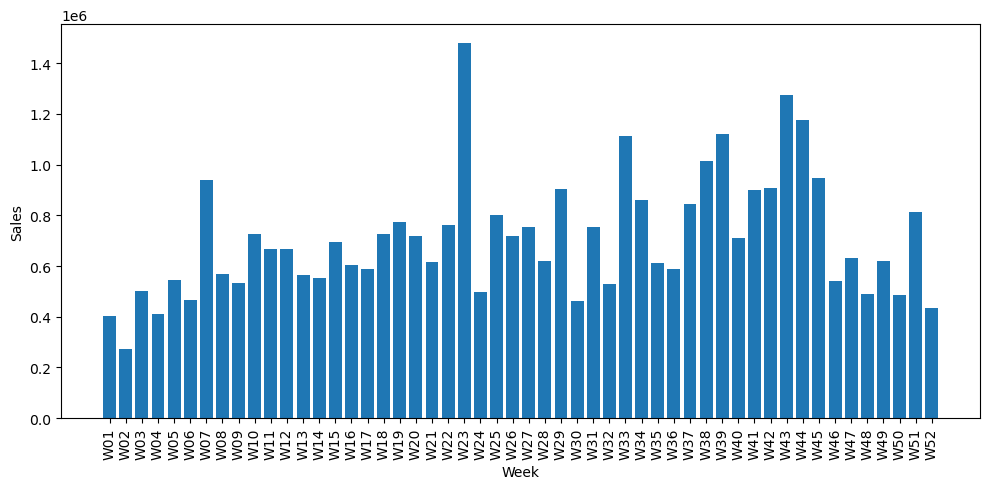

In [27]:
weeks = range(1, 53) # assuming 52 weeks in a year
week_labels = ['W{:02d}'.format(w) for w in weeks] # create week labels
plt.figure(figsize=(10,5)) # set figure size
plt.bar(weeks, forecasting.groupby('week')['Sales'].sum())
plt.xticks(weeks, week_labels, rotation='vertical', ha='center') # rotate x-axis labels
plt.ylabel('Sales')
plt.xlabel('Week')
plt.tight_layout() # adjust spacing between subplots
plt.show()


<b> Final Recommendation: </b>The sales data indicates that June had the highest sales, and week 23 falls within this month. This finding is consistent with the highest sales graph, which also showed a peak in June. Moreover, the graph highlights that store end promo had the highest impact on sales compared to other types of promos. In addition, the promotional activity data revealed that the highest promotional activity was also observed during the month of June, with store end promo being the most frequently used type of promotion. These findings suggest that the store end promo strategy was successful in increasing sales during this period, and further efforts could be made to optimize and refine this promotional approach. Overall, these insights can provide valuable guidance to businesses in developing effective sales and promotional strategies.